 # Problem 1

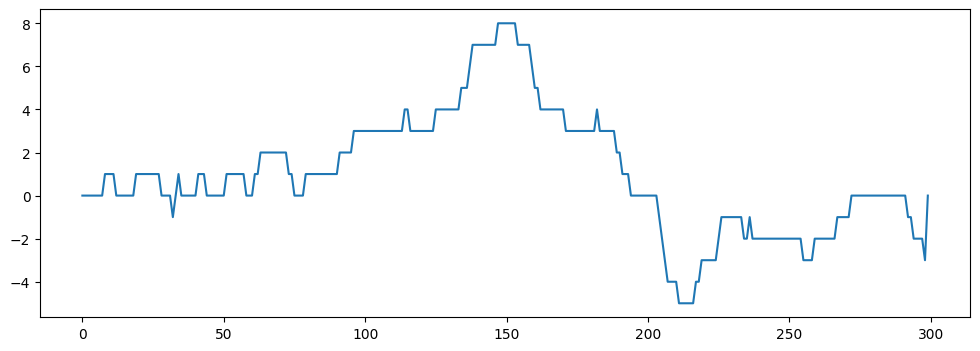

In [116]:
import Random
# set a seed so we get the same output every time
seed = 393845
Random.seed!(seed)
# initialize the vector of speeds
val = 0; u = zeros(300); u[1] = val
# set a density that determines how often the speed changes
# low density corresponds to infrequent speed changes
dens = 0.1
# build speed vector for all times between now and time 299
for i in 2:299
# if a uniform(0,1) variable is < density
if rand() < dens
# increase the speed by 1 mph
val = val + 1
u[i] = val
# if a uniform(0,1) variable is >= 1 - density
elseif rand() >= 1.0-dens
# decrease the speed by 1 mph
val = val - 1
u[i] = val
else# otherwise the speed stays the same
u[i] = val
end
end
# the final speed must be 0
u[300] = 0
# T = 300
T = length(u)
# plot the speeds (your figure should match the one in the assignment!)
using PyPlot
figure(figsize=(12,4))
plot(u,"-");

### When I start doing this homework I haven't figure out how to install Gurobi on Google Cloud Linux system. So I am using Ipopt here.

In [59]:
using JuMP, Ipopt

k = 3 #number of points to be balanced

# create a function that takes a value for λ then solves and reports solution of tradeoff problem
function TradeOff(λ)
    
    m = Model(Ipopt.Optimizer); # need Gurobi since it's nonlinear
    
    set_optimizer_attribute(m,"print_level",0)
    
    @variable(m, x[1:size(u)[1],1])  # new sequence
    
    @objective(m, Min, sum((u[i,1]-x[i,1])^2 for i in 1:size(u)[1]) + λ*sum((x[i,1]-x[i+1,1])^2 for i in 1:size(u)[1]-1))

    optimize!(m);
    y1 = value(sum((u[i,1]-x[i,1])^2 for i in 1:size(u)[1]))
    y2 = value(sum((x[i,1]-x[i+1,1])^2 for i in 1:size(u)[1]-1))
    xopt = value.(x)
    
    return (y1,y2,xopt)
end
;

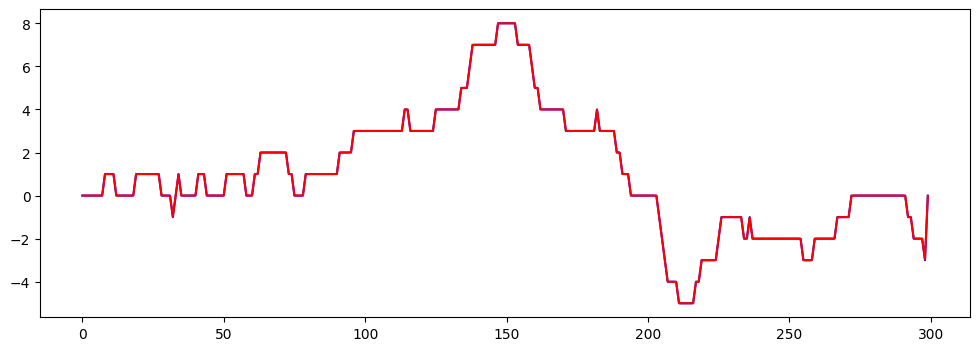

The trade off λ:0.01
Approximation error is:0.012070137340351238
Smoothness is:61.55006819093474


In [64]:
λ = 0.01
(y1x,y2x,x) = TradeOff(λ) # solve model with given λ

using PyPlot
figure(figsize=(12,4))
plot(u, "b-", markersize=4 )
plot(x, "r-", markersize=4 )

println("The trade off λ:", λ)
println("Approximation error is:", y1x)
println("Smoothness is:", y2x)

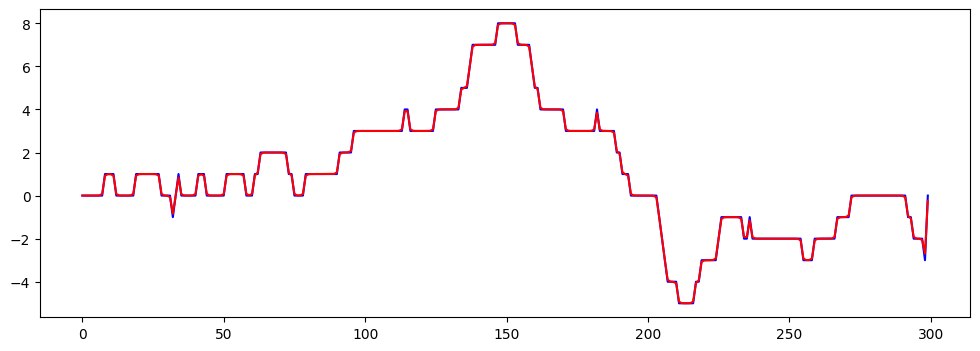

The trade off λ:0.1
Approximation error is:0.7719465268151351
Smoothness is:46.371490421778844


In [60]:
λ = 0.1
(y1x,y2x,x) = TradeOff(λ) # solve model with given λ

using PyPlot
figure(figsize=(12,4))
plot(u, "b-", markersize=4 )
plot(x, "r-", markersize=4 )

println("The trade off λ:", λ)
println("Approximation error is:", y1x)
println("Smoothness is:", y2x)

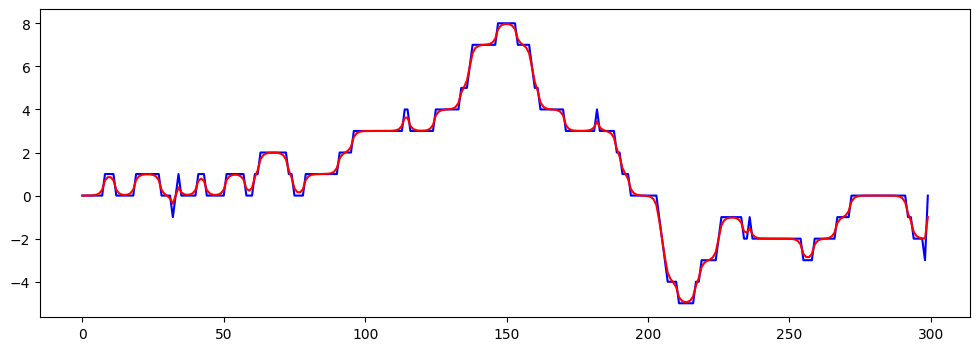

The trade off λ:1
Approximation error is:11.131077713282734
Smoothness is:17.78685925464608


In [61]:
λ = 1
(y1x,y2x,x) = TradeOff(λ) # solve model with given λ

using PyPlot
figure(figsize=(12,4))
plot(u, "b-", markersize=4 )
plot(x, "r-", markersize=4 )

println("The trade off λ:", λ)
println("Approximation error is:", y1x)
println("Smoothness is:", y2x)

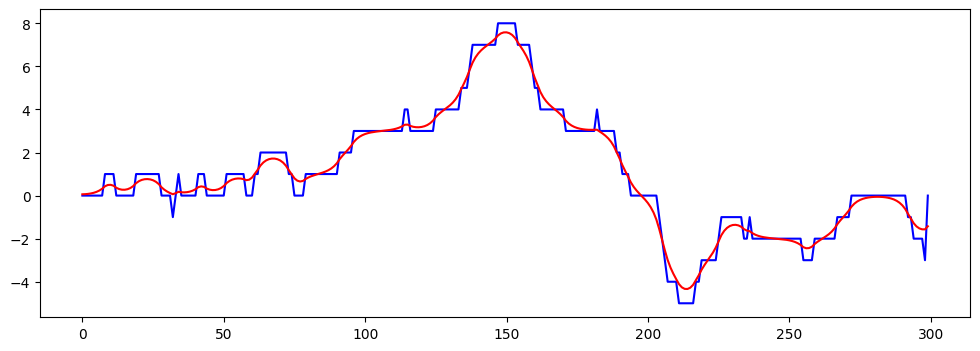

The trade off λ:10
Approximation error is:47.76355733133142
Smoothness is:6.163267577440435


In [62]:
λ = 10
(y1x,y2x,x) = TradeOff(λ) # solve model with given λ

using PyPlot
figure(figsize=(12,4))
plot(u, "b-", markersize=4 )
plot(x, "r-", markersize=4 )

println("The trade off λ:", λ)
println("Approximation error is:", y1x)
println("Smoothness is:", y2x)

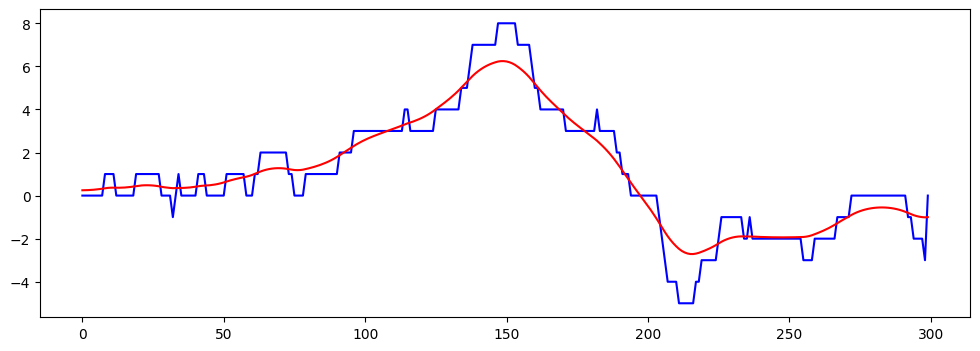

The trade off λ:100
Approximation error is:185.40513319792194
Smoothness is:1.9674540900103619


In [63]:
λ = 100
(y1x,y2x,x) = TradeOff(λ) # solve model with given λ

using PyPlot
figure(figsize=(12,4))
plot(u, "b-", markersize=4 )
plot(x, "r-", markersize=4 )

println("The trade off λ:", λ)
println("Approximation error is:", y1x)
println("Smoothness is:", y2x)

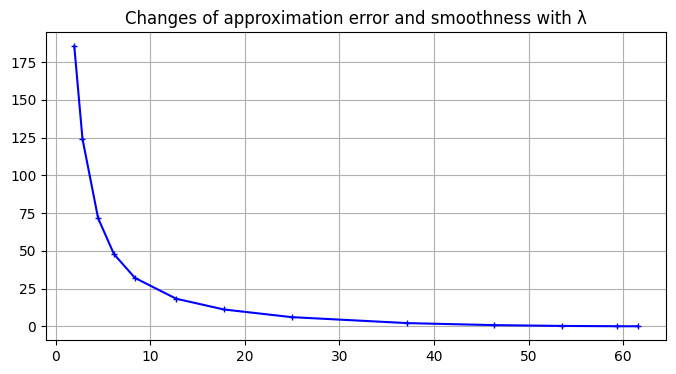

In [114]:
λ=[0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2, 5, 10, 20, 50, 100]
AppEr = zeros(size(λ)[1],1)
SmoEr = zeros(size(λ)[1],1)
for i in 1:size(λ)[1]
    (y1x,y2x,x) = TradeOff(λ[i])
    AppEr[i] = y1x
    SmoEr[i] = y2x
end

using PyPlot
figure(figsize=(8,4))
plot(SmoEr, AppEr, "b+-", markersize=4 )
xlabel("Approximation error")

title("Changes of approximation error and smoothness with λ")
grid()

In [75]:
AppEr

13×1 Array{Float64,2}:
   0.012070137340351238
   0.04562576583157962
   0.2434361997032121
   0.7719465268151351
   2.110898877630165
   6.063080268244302
  11.131077713282734
  18.25303441962431
  32.018547002546
  47.76355733133142
  71.65560271860419
 124.17646885351547
 185.40513319792194

In [76]:
SmoEr

13×1 Array{Float64,2}:
 61.55006819093474
 59.30248034390728
 53.5543332163201
 46.371490421778844
 37.16518116090079
 24.941680909935656
 17.78685925464608
 12.742996386426734
  8.384667543296764
  6.163267577440435
  4.482851696996066
  2.833323914409505
  1.9674540900103619

## From the above computation based on different $\lambda$, it can be easily found that with the increase of $\lambda$ the smoothness of designed speed change sequence will increase for the increasing $\lambda$ gives higer weight on the smoothness. Correspondingly, the approximation error of the designed sequence will increase for the difference between two sequence is increasing.

 # Problem 2

## a)

## For a polynomial of degree 3: $$w_1x^3+w_2x^2+w_3x+w_4=d$$
## The required parameters are $w_1, w_2, w_3, w_4$
## Since we have the desired speed sequence and we know the speed is changing along the time, we can assume we have relationship:$$w_1t_i^3+w_2t_i^2+w_3t_i+w_4=d_i$$
## So a curve regression can be formulated as:$$Aw=d$$
## where: $$A=\left[ \begin{array} {cccc}t_1^3&t_1^2&t_1&1\\t_2^3&t_2^2&t_2&1\\\vdots&\vdots&\ddots&\vdots\\t_n^3&t_n^2&t_n&1\end{array} \right], w=\left[ \begin{array} {c}w_1\\\vdots\\w_4\end{array} \right], d=\left[ \begin{array} {c}d_1\\\vdots\\d_n\end{array} \right]$$
## The solution is: $$w=A/d$$

In [103]:
A=zeros(size(x)[1],4)
A[:,1]=t.^3
A[:,2]=t.^2
A[:,3]=t.^1
A[:,4]=t.^0

w = A\u

println("w1=", w[1])
println("w2=", w[2])
println("w3=", w[3])
println("w4=", w[4])

w1=1.3446111014666878e-6
w2=-0.0008256988224646964
w3=0.1286361181683565
w4=-2.5748452841887266


## b)

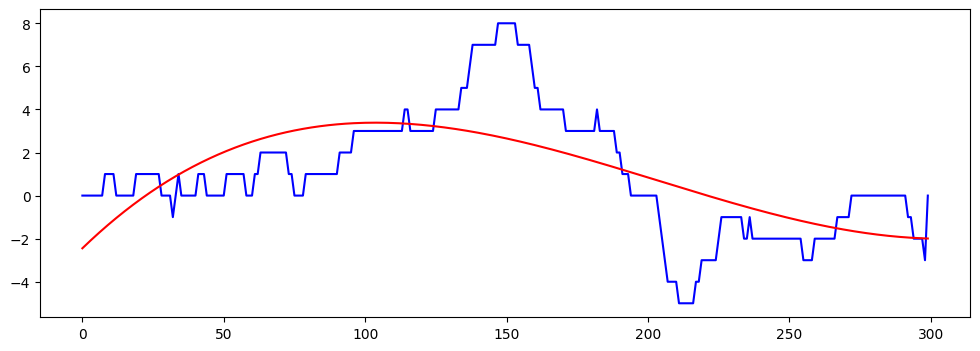

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fea876c7748>

In [118]:
x = A*w

using PyPlot
figure(figsize=(12,4))
plot(u, "b-", markersize=4 )
plot(x, "r-", markersize=4 )

## c)

In [107]:
error = x - u
error2norm = sum(error.^2)

1337.0495596442865

## Compared with the method used in Problem 1, the polynomial regression here got a worse result for the error is higher: just like when the $\lambda$ is very large to guarantee the smoothness. To imporve the fitting, it would be better using a piecewise fitting method, which has a similar effect as the regularization we used in the Problem 1.

In [117]:
using JuMP, Gurobi

k = 3 #number of points to be balanced

# create a function that takes a value for λ then solves and reports solution of tradeoff problem
function TradeOff(λ)
    
    m = Model(Gurobi.Optimizer); # need Gurobi since it's nonlinear
    
    set_optimizer_attribute(m,"OutputFlag",0)
    
    @variable(m, x[1:size(u)[1],1])  # new sequence
    
    @objective(m, Min, sum((u[i,1]-x[i,1])^2 for i in 1:size(u)[1]) + λ*sum((x[i,1]-x[i+1,1])^2 for i in 1:size(u)[1]-1))

    optimize!(m);
    y1 = value(sum((u[i,1]-x[i,1])^2 for i in 1:size(u)[1]))
    y2 = value(sum((x[i,1]-x[i+1,1])^2 for i in 1:size(u)[1]-1))
    xopt = value.(x)
    
    return (y1,y2,xopt)
end
;

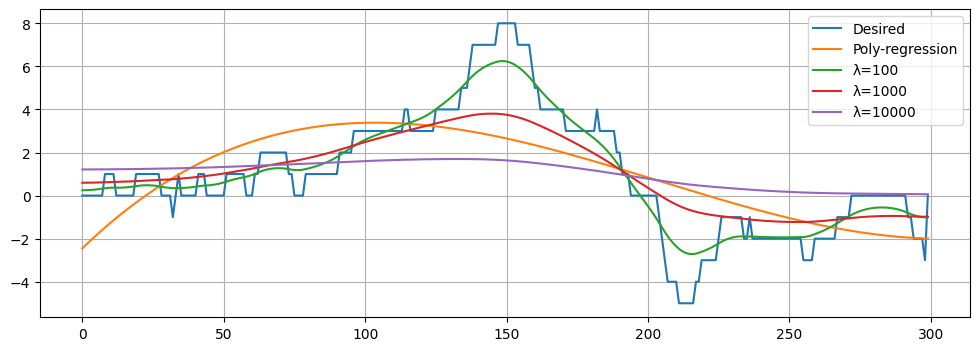

In [119]:
λ = 100
(y1x,y2x,x1) = TradeOff(λ) # solve model with given λ

λ = 1000
(y1x,y2x,x2) = TradeOff(λ) # solve model with given λ

λ = 10000
(y1x,y2x,x3) = TradeOff(λ) # solve model with given λ

using PyPlot
figure(figsize=(12,4))
plot(u, "-", markersize=4)
plot(x, "-", markersize=4)
plot(x1, "-", markersize=4)
plot(x2, "-", markersize=4)
plot(x3, "-", markersize=4)
legend(["Desired","Poly-regression","λ=100","λ=1000","λ=10000"])
grid()